# Futures Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of futures.)
    
    NOTE: pinkfish does not yet have full support for futures backtesting, and
    the futures data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)

micro_futures = {
    'MES=F': 'Micro E-mini S&P 500 Index Futures',
    'MNQ=F': 'Micro E-mini Nasdaq-100 Index Futures',
    'M2K=F': 'Micro E-mini Russell 2000 Index Futures',
    'MYM=F': 'Micro E-mini Dow Jones Futures',
    'MGC=F': 'Micro Gold Futures',
    'SIL=F': 'Micro Silver Futures',
    'M6A=F': 'Micro AUD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'MCD=F': 'Micro CAD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'M6E=F': 'Micro EUR/USD Futures',
    'M6B=F': 'Micro GBP/USD Futures',
    'MIR=F': 'Micro INR/USD Futures'
}

symbols = list(micro_futures)
#symbols = ['MES=F']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'sell_short' : False,
    'force_stock_market_calendar' : True,
    'margin' : 2,
    'sma_timeperiod_slow': 50,
    'sma_timeperiod_fast': 10,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()




View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2019-07-16,0,1.02,14698,entry,LONG,MSF=F
0,2019-07-16,1,0.70,24070,entry,LONG,M6A=F
0,2019-07-16,2,1411.20,5,entry,LONG,MGC=F
0,2019-07-16,3,1.13,19712,entry,LONG,M6E=F
0,2019-07-16,4,7942.75,1,entry,LONG,MNQ=F


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2019-07-16,1.13,2019-07-24,1.12,-0.01,-153.75,19712,-153.75,LONG,M6E=F
0,2019-07-16,0.70,2019-08-01,0.68,-0.02,-510.28,24070,-664.04,LONG,M6A=F
0,2019-07-16,145.42,2019-08-05,139.89,-5.53,-1410.15,255,-2074.19,LONG,MIR=F
0,2019-07-16,1565.50,2019-08-08,1534.10,-31.40,-188.40,6,-2262.59,LONG,M2K=F
0,2019-07-16,0.77,2019-08-08,0.76,-0.01,-301.76,29877,-2564.35,LONG,MCD=F


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-12-21,100799.07,100799.07,100799.07,91408,-69761.86,1.69,O
2023-12-22,101025.21,101025.21,101025.21,91408,-69761.86,1.69,-
2023-12-26,101349.38,101349.38,101349.38,91408,-69761.86,1.69,-
2023-12-27,101770.58,101770.58,101770.58,91408,-69761.86,1.69,-
2023-12-28,101575.38,101575.38,101575.38,0,101575.38,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2019-07-16
end                                                    2023-12-28
beginning_balance                                          100000
ending_balance                                          101575.38
total_net_profit                                          1575.38
gross_profit                                             37380.19
gross_loss                                              -35804.81
profit_factor                                                1.04
return_on_initial_capital                                    1.58
annual_return_rate                                           0.35
trading_period                           4 years 5 months 12 days
pct_time_in_market                                          91.35
margin                                                          2
avg_leverage                                                 1.21
max_leverage                                                 1.91
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
M6B=F,"$1,587.24",0.08,1.01,12.09
MSF=F,$887.85,0.08,0.56,6.76
M6A=F,-$559.82,0.08,-0.36,-4.26
MGC=F,"$1,976.70",0.08,1.25,15.06
M6E=F,$42.74,0.08,0.03,0.33
MNQ=F,$349.00,0.08,0.22,2.66
M2K=F,$574.10,0.08,0.36,4.37
MIR=F,"-$6,865.54",0.08,-4.36,-52.30
SIL=F,"$1,999.78",0.08,1.27,15.23
MCD=F,"-$1,150.42",0.08,-0.73,-8.76


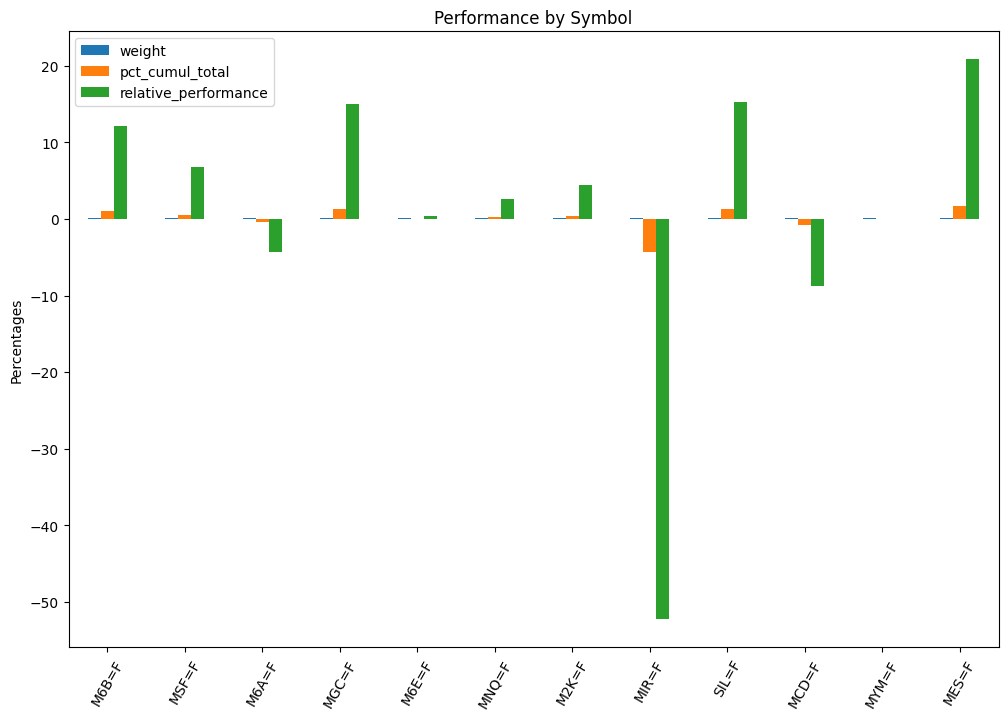

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,M6B=F,MSF=F,M6A=F,MGC=F,M6E=F,MNQ=F,M2K=F,MIR=F,SIL=F,MCD=F,MYM=F,MES=F
M6B=F,1.00,0.57,0.69,0.31,0.69,0.29,0.32,0.36,0.34,0.60,0.29,0.31
MSF=F,0.57,1.00,0.55,0.42,0.78,0.10,0.07,0.21,0.38,0.43,0.04,0.08
M6A=F,0.69,0.55,1.00,0.37,0.63,0.38,0.45,0.40,0.43,0.75,0.39,0.41
MGC=F,0.31,0.42,0.37,1.00,0.34,0.09,0.09,0.14,0.78,0.26,0.07,0.08
M6E=F,0.69,0.78,0.63,0.34,1.00,0.19,0.21,0.33,0.34,0.52,0.16,0.19
MNQ=F,0.29,0.10,0.38,0.09,0.19,1.00,0.78,0.33,0.17,0.36,0.81,0.93
M2K=F,0.32,0.07,0.45,0.09,0.21,0.78,1.00,0.37,0.21,0.46,0.87,0.88
MIR=F,0.36,0.21,0.40,0.14,0.33,0.33,0.37,1.00,0.16,0.39,0.35,0.36
SIL=F,0.34,0.38,0.43,0.78,0.34,0.17,0.21,0.16,1.00,0.36,0.17,0.17
MCD=F,0.60,0.43,0.75,0.26,0.52,0.36,0.46,0.39,0.36,1.00,0.43,0.43


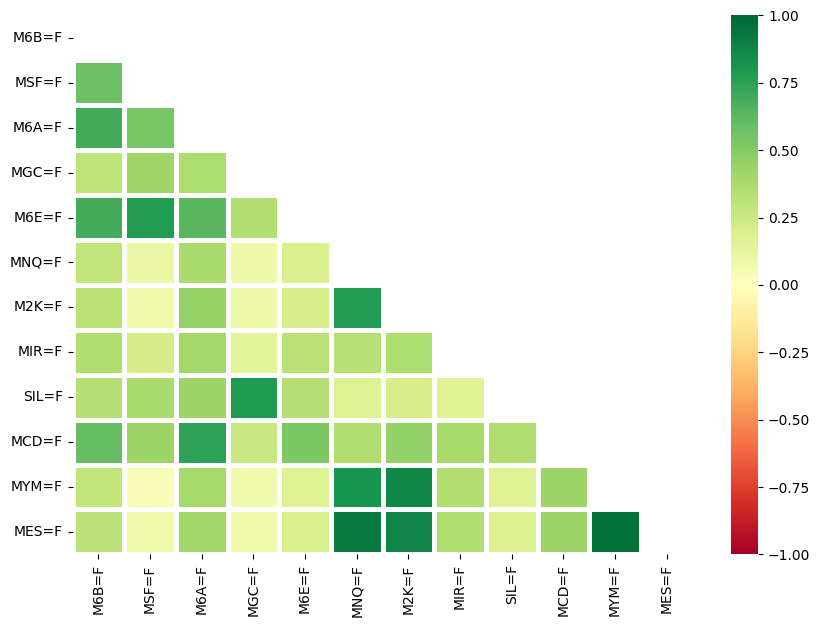

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

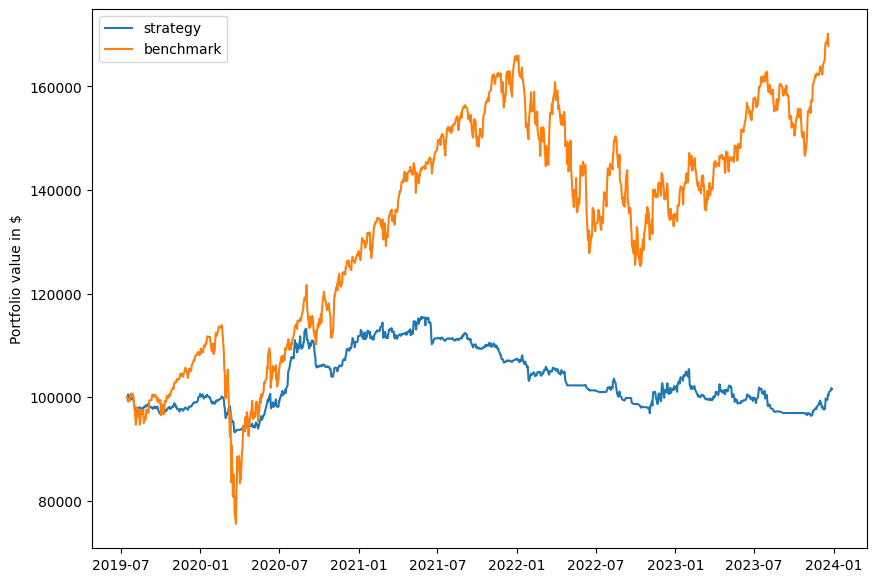

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,0.35,12.40
max_closed_out_drawdown,-16.55,-33.66
annualized_return_over_max_drawdown,0.02,0.37
best_month,10.55,23.02
worst_month,-6.84,-30.94
sharpe_ratio,0.08,0.65
sortino_ratio,0.10,0.79
monthly_std,2.25,5.53
annual_std,8.90,18.79


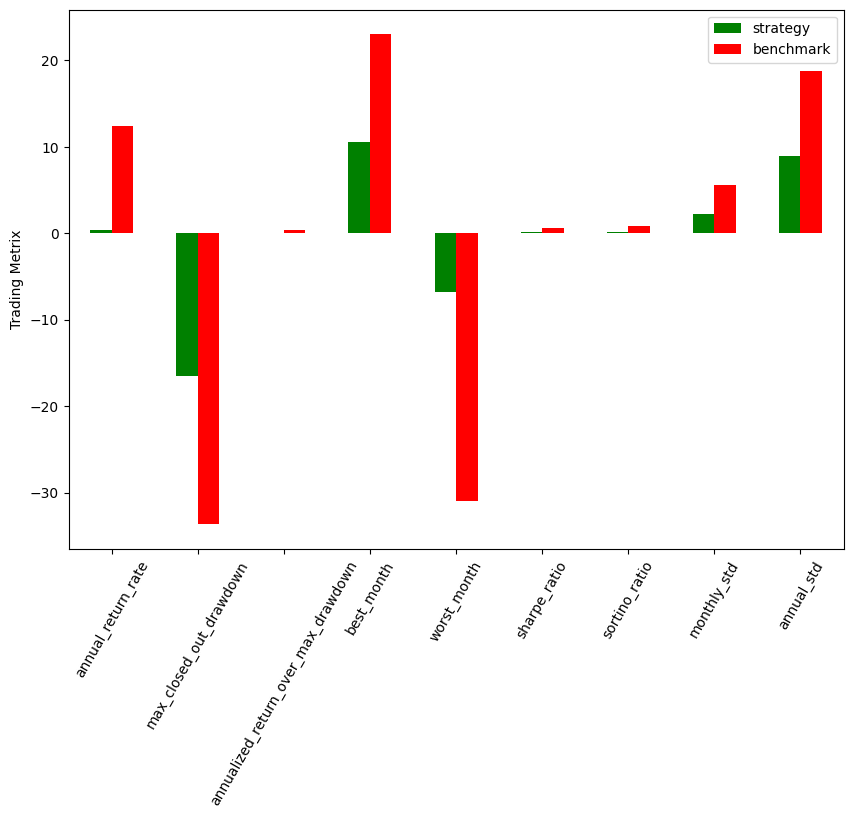

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio             0.08
sharpe_ratio_max         0.17
sharpe_ratio_min        -0.01
strategy risk            0.09
instrument risk          0.19
optimal target risk      0.08
half kelly criterion     0.04
aggressive leverage      0.45
moderate leverage        0.23
conservative leverage   -0.01
dtype: float64